# Hudson Arney
## Lab 4 - KNN
### CSC 5601 - Theory of Machine Learning
### Introduction: 
In this lab, I explored the K-Nearest Neighbors (KNN) algorithm, starting with its implementation from scratch and testing on diverse datasets to understand its performance across varying decision boundaries. I then investigated the significance of parameter selection, particularly the "k" value, through cross-fold validation to ascertain its impact on predictive accuracy. Along the way, I examined runtime complexities and delineated between linear and non-linear decision boundaries to better understand KNN's applicability in real-world classification tasks.

## Reflection Questions

### KNN Implementation (Problem 1)
- Estimate the run time complexity in Big O notation of training a KNN model. Justify your answer.
    
    I would estimate the run time complexity is quite low for training a KNN model becaues it is a "lazy learner." In Big O notation I would guess O(1) constant time because all you have to do is store the training data.


- Estimate the run time complexity in Big O notation of predicting the output value for a query point using a training set of N points, with p features, and k neighbors with a KNN model. Justify your answer.

    Step 1: Calculating the distance between the query point and each of the N training points: O(np)
    Step 2: Sorting the neighbor list (using a heap): O(n log k) (if using max-heap) (or O(n+k log n) (if using min-heap))
    Step 3: Get known labels: O(k)
    Step 4: Aggregation (calculating the mode for classification or the mean for regression): O(k)

    Total run time: O(np + n log k + k) = O(np)

- What do you think the potential downsides of the k-nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?
   
    KNN's prediction time complexity grows quickly with the number of training points (N) and the number of features (p), as well as with the number of neighbors considered (k). This computational cost can become prohibitive for large datasets. One example to combat this problem is by using Random Forests because of it's parallelization strategies makes it better for larger datasets.

### Decision Boundaries (Problem 2)
- For each of the three data sets, do you think a linear decision boundary could be used to accurately classify the data points?
   
    The Rocky Ridge Dataset has the best chance at making a linear decision boundary that is worthwhile. In the moon data the decision boundary is more of an "S" shape and the circles data has an inner and outer circle cluster. Both of these examples would not be accuractly divided by a linear line.

- What do we mean by a "non-linear" decision boundary? Give an example of a non-linear function that could be used as a decision boundary for one of the data sets.
    
    A non-linear decision boundary is needed when the dataset has two clusters that can not be divided by a "straight" 2-D line. Some examples of a non-linear decision boundary could be a circular line, curved line, etc. For the circles data set a circular line inbetween the outer and inner clusters would work as a good decision boundary. 

- What are the advantages of non-linear decision boundaries over linear decision boundaries? What are the disadvantages?
   
    Non-linear decision boundaries are more prone to overfitting by focusing to much on naunces in the training data but once given unique testing data it starts to struggle more. 
    There is also an added complexity to a non-linear boundary which may make it harder to interpret or more computationally expensive. 

### Choosing an Optimal Value for k (Problem 3)
- What value of k gave the highest accuracy?
    
    41 gave the best out of the values I printed.

- For large values of k, what happened to the accuracy? Why do you think this is?
    
    After 51, the accuracy continued to decrease. I believe this was due to the model starting to generalize too much, averaging over a larger number of data points. This could have lead the model to ignoring important local patterns or structures in the data.

- Let's say that we ask you to use the following experimental setup to find a value of k that maximizes the accuracy of the model's predictions: split the data set into training and testing sets, train a model for each value of k using the training set, predictions the classes of the testing points, and evaluate the accuracy of the predictions. Could this approach give you misleading results? If so, why?
    
    Yes, training a model for each value of k using a training set and evaluating the accuracy on a testing set without cross-validation could potentially lead to misleading results. The main issue with this approach is that it relies heavily on the specific random split of the data into training and testing sets. Depending on how the data is split, the accuracy of the model for a particular value of k may vary significantly. If the data split happens to be biased or unrepresentative of the overall dataset, the accuracy metrics obtained from testing on that particular split may not accurately reflect the model's true performance.

- It is considered a "best practice" to use cross-fold validation when optimizing parameters. Why do you think that is?
    
    Cross-validation addresses this issue stated earlier by partitioning the dataset into multiple subsets/folds and performing training and testing on different combinations of them. This helps to ensure that the model's performance is evaluated across multiple diverse subsets of the data, which gives a more reliable and generalized performance estimate.

**Explore Decision Boundaries for 3 Data Sets**

2. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import knn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


3. 

            1. 

In [2]:
file_path = "C:/Users/arneyh/CSC 5601 - Theory of Machine Learning/Labs/Lab 4/lab-4-k-nearest-neighbors-arneyHudson/Data/"

moon_data = pd.read_csv(file_path + "moons.csv")
circles_data = pd.read_csv(file_path + "circles.csv")
rocky_ridge_data = pd.read_csv(file_path + "rocky_ridge.csv")


In [3]:
moon_data.head()

,label,x,y
0,0,0.031595,0.986988
1,1,2.115098,-0.046244
2,0,0.882490,-0.075756
3,1,-0.055144,-0.037332
4,1,0.829545,-0.539321


In [4]:
circles_data.head()

,label,x,y
0,1,-0.382891,-0.090840
1,1,-0.020962,-0.477874
2,0,-0.396116,-1.289427
3,1,-0.618130,-0.063837
4,1,0.703478,-0.187038


In [5]:
rocky_ridge_data.head()

,label,x,y
0,1,-0.177497,0.930496
1,0,1.977424,1.766155
2,0,1.800024,1.700343
3,1,-0.770837,2.359163
4,1,-0.308009,1.594063


3. 

In [6]:
def train_and_evaluate(data, title):
    X = data[['x', 'y']].values
    y = data['label'].values
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    train_X_scaled = scaler.fit_transform(train_X)
    test_X_scaled = scaler.transform(test_X)
    
    # Instantiate and fit a KNN model with 3 neighbors
    knn_model = knn.KNN(k=3, aggregation_function='mode')
    knn_model.fit(train_X_scaled, train_y)
    
    # Generate grid points for evaluation
    xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict values for each point on the grid
    Z = knn_model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)

    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("KNN Decision Boundary - " + title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

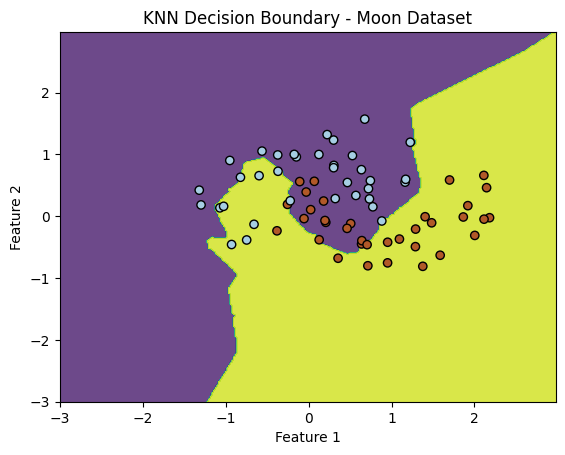

In [7]:
# Call the function for each dataset
train_and_evaluate(moon_data, "Moon Dataset")

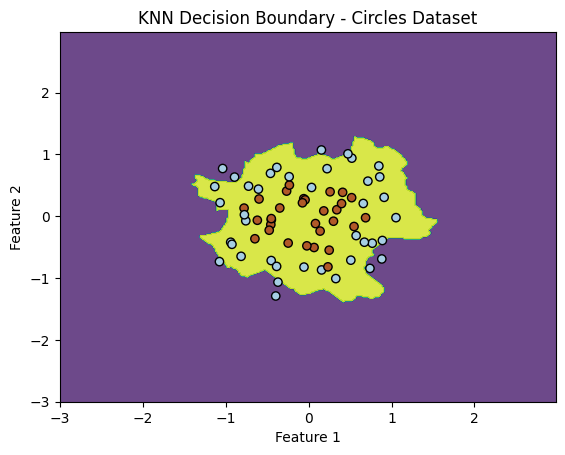

In [8]:
train_and_evaluate(circles_data, "Circles Dataset")

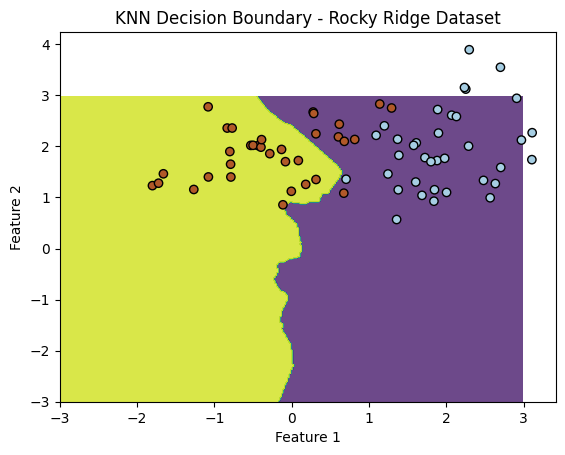

In [9]:
train_and_evaluate(rocky_ridge_data, "Rocky Ridge Dataset")

## Choosing an Optimal Value for k
1. Load the fourth data set (sweep.csv).

In [10]:
sweep_df = pd.read_csv(file_path + "sweep.csv")
sweep_df.head()

,labels,x,y
0,0.0,3.057563,-0.101047
1,0.0,-2.115610,2.193685
2,0.0,-1.083560,-1.091495
3,1.0,-2.210543,0.359090
4,0.0,2.533183,1.030012


2. Evaluate the impact of the k parameter using cross-fold validation. Repeat the following process for values of k from 1 to 200 in steps of 10.
        
        1. Use sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True) to divide the data set into 10 folds.



In [11]:
avg_accuracy_scores = []
std_accuracy_scores = []

In [12]:
X = sweep_df[['x', 'y']]
y = sweep_df['labels']

In [13]:
k_values = list(range(1, 201, 10))
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [14]:
for k in k_values:
    # Initialize list to store accuracy scores for current k
    accuracy_scores = []
    
    # Iterate through folds
    for train_index, test_index in skf.split(X, y):
        # Split data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize KNN model with current k value
        knn_model = knn.KNN(k=k, aggregation_function='mode')  # Assuming classification task
        
        # Train the model
        knn_model.fit(X_train.values, y_train.values)
        
        # Predict labels for test set
        y_pred = knn_model.predict(X_test.values)
        
        # Calculate accuracy and append to list
        accuracy = np.mean(y_pred == y_test)
        accuracy_scores.append(accuracy)
    
    # Calculate average and standard deviation of accuracy scores for current k
    avg_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Append average and standard deviation to respective lists
    avg_accuracy_scores.append(avg_accuracy)
    std_accuracy_scores.append(std_accuracy)

# Print average and standard deviation of accuracy scores for each k
for k, avg_acc, std_acc in zip(k_values, avg_accuracy_scores, std_accuracy_scores):
    print(f"k={k}, Avg Accuracy={avg_acc:.4f}, Std Deviation={std_acc:.4f}")

k=1, Avg Accuracy=0.8160, Std Deviation=0.0862
k=11, Avg Accuracy=0.8720, Std Deviation=0.0640
k=21, Avg Accuracy=0.8600, Std Deviation=0.0573
k=31, Avg Accuracy=0.8640, Std Deviation=0.0480
k=41, Avg Accuracy=0.8720, Std Deviation=0.0466
k=51, Avg Accuracy=0.8720, Std Deviation=0.0665
k=61, Avg Accuracy=0.8600, Std Deviation=0.0410
k=71, Avg Accuracy=0.8440, Std Deviation=0.0550
k=81, Avg Accuracy=0.8240, Std Deviation=0.0320
k=91, Avg Accuracy=0.8000, Std Deviation=0.0310
k=101, Avg Accuracy=0.7840, Std Deviation=0.0196
k=111, Avg Accuracy=0.7840, Std Deviation=0.0196
k=121, Avg Accuracy=0.7840, Std Deviation=0.0196
k=131, Avg Accuracy=0.7840, Std Deviation=0.0196
k=141, Avg Accuracy=0.7840, Std Deviation=0.0196
k=151, Avg Accuracy=0.7840, Std Deviation=0.0196
k=161, Avg Accuracy=0.7840, Std Deviation=0.0196
k=171, Avg Accuracy=0.7840, Std Deviation=0.0196
k=181, Avg Accuracy=0.7840, Std Deviation=0.0196
k=191, Avg Accuracy=0.7840, Std Deviation=0.0196


3. Use matplotlib.pyplot.errorbar() to plot the average and standard deviation (as error bars) for each value of k.

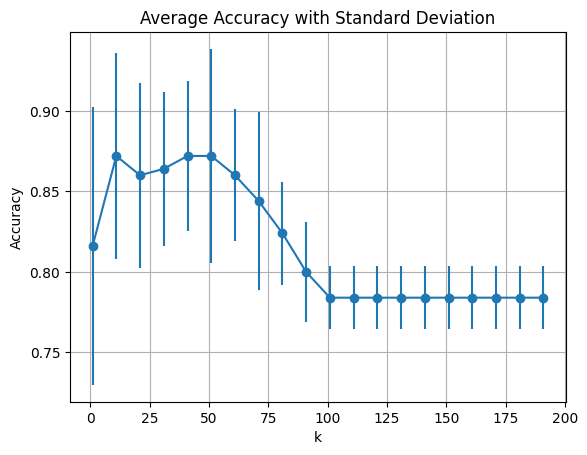

In [17]:
plt.errorbar(k_values, avg_accuracy_scores, yerr=std_accuracy_scores, fmt='-o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Average Accuracy with Standard Deviation')
plt.grid(True)
plt.show()